# LOADING LIBRARIES

In [2]:
# **************************************************************************************
# LIBRARIES ****************************************************************************
# **************************************************************************************

# General-purpose libraries for operating system interactions, JSON data manipulation, and date/time handling.
import os  # Interact with the operating system
import json  # Work with JSON data
from random import randint  # Generate random integers
from time import sleep  # Introduce delays in code execution

from datetime import datetime, timedelta  # Manipulate dates and times
# **************************************************************************************

# Fundamental scientific computing libraries like NumPy and Pandas.
import numpy as np  # Fundamental package for scientific computing
import pandas as pd  # Data manipulation library
# **************************************************************************************

# **************************************************************************************
# **************************************************************************************

# Specialized libraries for scientific computing, namely SciPy
import scipy  # Scientific computing and technical computing library
import scipy.stats as st
# **************************************************************************************

# Web-related tasks, such as making HTTP requests, parsing HTML/XML data, and web scraping
import requests  # Perform HTTP requests
from bs4 import BeautifulSoup  # Parse HTML and XML data
# **************************************************************************************

#String operations
import regex as re
import string
from nltk.corpus import stopwords

# Pretty-print Python data structures
import pprint
# **************************************************************************************

# Visualization oriented
import matplotlib.pyplot as plt  # Create static visualizations
import seaborn as sns  # Statistical data visualization
from plotly import express as px  # Create interactive plots and charts

# **************************************************************************************
# **************************************************************************************

# Machine learning : preprocessing, dimensionality reduction, one-hot encoding, and clustering
import sklearn  # Machine learning library

from sklearn import svm

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler  # Standardize features
from sklearn.preprocessing import OneHotEncoder  # One-hot encode categorical features

from sklearn.decomposition import PCA  # Perform dimensionality reduction
from sklearn.cluster import KMeans  # Perform clustering

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
)


#Handling Imbalanced Datasets
import imblearn  # Handle imbalanced datasets in machine learning

# **************************************************************************************
# **************************************************************************************

#Web Scraping
import scrapy  # Web scraping framework

#Saving Stuff
import pickle

#Deep Learning
# import pytorch  # Deep learning library

# **************************************************************************************
# FUNCTIONS ****************************************************************************
# **************************************************************************************

#from functions import scoring (name of function)

# FIRST LOOK AT THE DATASET

In [3]:
data = pd.read_csv("steam.csv")

In [4]:
df = data

In [5]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [7]:
df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [8]:
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
27070    False
27071    False
27072    False
27073    False
27074    False
Length: 27075, dtype: bool

In [9]:
df.isnull().any(axis=1).value_counts()

False    27075
dtype: int64

In [14]:
df["appid"].value_counts()

10         1
733550     1
734350     1
734330     1
734290     1
          ..
466770     1
466740     1
466730     1
466720     1
1069460    1
Name: appid, Length: 27075, dtype: int64

In [10]:
df.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

# ABOVE WORKS

In [16]:
print("Les doublons suivants ont été trouvés:\n")
print(df.loc[df.duplicated(keep=False), :])
print()


Les doublons suivants ont été trouvés:

Empty DataFrame
Columns: [appid, name, release_date, english, developer, publisher, platforms, required_age, categories, genres, steamspy_tags, achievements, positive_ratings, negative_ratings, average_playtime, median_playtime, owners, price]
Index: []



C:\Users\theya\AppData\Local\Temp\ipykernel_24052\1049756392.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['appid'], bins = 20)


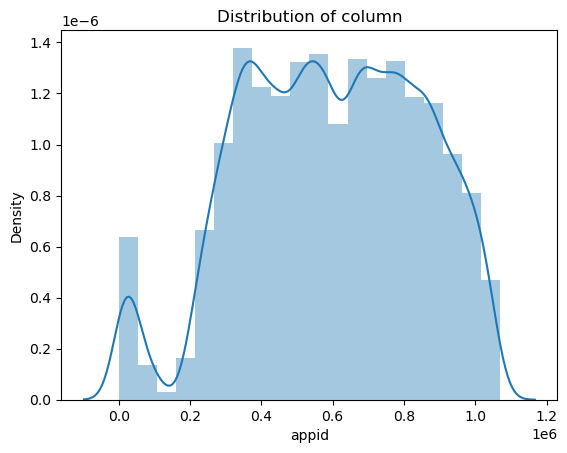

In [18]:
# Visualize the distribution of any column
sns.distplot(df['appid'], bins = 20)
plt.title('Distribution of column')
plt.show()

# DATA CLEANING

## Handling Missing Values:

In [ ]:
# # Fill missing values with a specific value
# df['column_name'].fillna(value, inplace=True)

# # Fill missing values with the mean of the column
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# # # Drop rows with missing values
# # df = df.dropna()

# # # Fill missing values with a specific value
# # df = df.fillna(value)

# # # Forward fill missing values
# # df = df.ffill()

# # # Backward fill missing values
# # df = df.bfill()

## Handling Duplicates:

In [ ]:
# # Drop duplicated rows
# df = df.drop_duplicates()

## Handling Outliers:


In [ ]:
# # With n.largest()
# display(df["column"].nlargest(5))
# display(df["column1"].nlargest(5))

In [ ]:
# # Assuming 'df' is our DataFrame and 'column' is the column with outliers
# mean = np.mean(df['column'])
# std = np.std(df['column'])
# threshold = 3

# df = df[(np.abs(df['column'] - mean) < threshold * std)]

## Columns Operations

### Moving Columns to Reorder Them

In [ ]:
new_columns_order = ["column", "column3", "column1", "column2"]
df = df[new_columns_order]

### Splitting 1 column into 2

In [ ]:
# Split neighbourhood_full
df = df['neighbourhood_full'].str.split(",", expand = True)
df.head()

### Transforming Categorical Values in Numerical Values

In [ ]:
event_list = ['Snow', 'Fog', 'Rain', 'Thunderstorm']
df_fixed = df

df_fixed[event_list] = 0

df_fixed['Rain'] = df_fixed['Events'].str.contains('Rain').astype(int)
df_fixed['Snow'] = df_fixed['Events'].str.contains('Snow').astype(int)
df_fixed['Fog'] = df_fixed['Events'].str.contains('Fog').astype(int)
df_fixed['Thunderstorm'] = df_fixed['Events'].str.contains('Thunderstorm').astype(int)

### Dropping Columns We Dislike

In [ ]:
# Assuming 'df' is our DataFrame and 'column' is the unwanted column we want to drop
df = df.drop(["column"], axis=1)

### Renaming Columns

In [ ]:
df.rename(columns = {'column1': 'column_1', 'column2.0': 'column_2'}, inplace=True)

## Rows Operations

### Removing Rows Based on Conditions:


In [ ]:
# FILTERING : Assuming 'df' is our DataFrame and 'column' is the column to filter on
df = df[df['column'] != condition]

# DROPPING ROWS WITH MISSING VALUES
df = df.dropna(subset=['column'])
df = df.dropna(subset=['column1'])

df.isnull().sum()

# DELETING ROWS THAT ARE UNEXPLOITABLE
print(len(df))

# COUNTRIES WHICH ARE NOT
indices_to_drop1 = df.loc[df['location'] == 'Tel Aviv, Israel'].index
df = df.drop(indices_to_drop1)
print(len(df))

# YEARS OF EXPERIENCE = 0
indices_to_drop2 = df.loc[df['years_of_experience'] == 0].index
df = df.drop(indices_to_drop2)
print(len(df))

# MISGENDERING
indices_to_drop3 = df.loc[df['gender'] == "Title: Senior Software Engineer"].index
df = df.drop(indices_to_drop3)
print(len(df))

# SPECIFIC ROWS OPERATIONS INSIDE A COLUMN USING GROUPBY
df.groupby('company_name')['title'].value_counts().to_frame()

## Categorical and Formatting Operations

### Converting Categorical Variables to Numeric:

In [ ]:
# Converting both columns to datetime
df['column'] = pd.to_datetime(df['column'], format = '%Y-%m-%d')
df['column1'] = pd.to_datetime(df['column1'], format = '%Y-%m-%d')

### Converting Columns Variables to DateTime:

In [ ]:
# Assuming 'df' is our DataFrame and 'column' is the categorical column
df['column'] = df['column'].astype('category')
df['column'] = df['column'].cat.codes

### Changing Data Types:

In [ ]:
# Assuming 'df' is our DataFrame and 'column' is the column to convert
df['column'] = df['column'].astype(new_data_type)

## Text Operations

### Finding Typos

In [ ]:
df['column', "column_1"].unique()

### Removing Whitespace:

In [ ]:
# Assuming 'df' is our DataFrame and 'column' is the column to clean
df['column'] = df['column'].str.strip()

### Removing Special Characters from Strings:

In [ ]:
# Assuming 'df' is our DataFrame and 'column' is the column to clean
df['column'] = df['column'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

### Deal with Capitalized Values


In [ ]:
df['room_type'] = df['room_type'].str.lower()

# df['room_type'] = df['room_type'].str.Capitalize()

### Remove punctuation


In [ ]:
df['column_name'] = df['column_name'].str.replace('[{}]'.format(string.punctuation), '')

### Remove stopwords


In [ ]:
stopwords = set(stopwords.words('english'))
df['column_name'] = df['column_name'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

### Replacing Typos

In [ ]:
# MANY VALUES: Replace values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' if applicable.
mappings = {'private room': 'Private Room', 
            'private': 'Private Room',
            'entire home/apt': 'Entire place',
            'shared room': 'Shared room',
            'home': 'Entire place'}

# Replace values and collapse data
airbnb['room_type'] = airbnb['room_type'].replace(mappings)
airbnb['room_type'].unique()


# SINGLE VALUE: From "SOFT ENGINEER" to "SOFTWARE ENGINEER"

print(df['title'].value_counts())
df['title'] = df['title'].replace('Soft Engineer', 'Software Engineer')

print(df['title'].value_counts())

# DATA VISUALIZATION

## Boxplot Visualizations

In [ ]:
plt.boxplot(df['column'])

plt.title('Boxplot for Whatever')
plt.xlabel('Whatever Values')
plt.ylabel('Values')
plt.ticklabel_format(style='plain', axis='y')

# DATA CORRELATION

# DATA EXPORTING

## .CSV

In [ ]:
df.to_csv("New_Data.csv", sep = ";", index = False)

## SQL

In [ ]:
# First way :

import getpass
sql_pass = getpass.getpass()

connection_string = 'mysql+pymysql://root:' + sql_pass + '@localhost:3306/'
engine = create_engine(connection_string)

data.to_sql('project_3_cleaning_data', engine, 'project_3', if_exists='replace', index=True)

In [ ]:
# Second way :